In [ ]:
Step 1: Exploratory Data Analysis (EDA)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


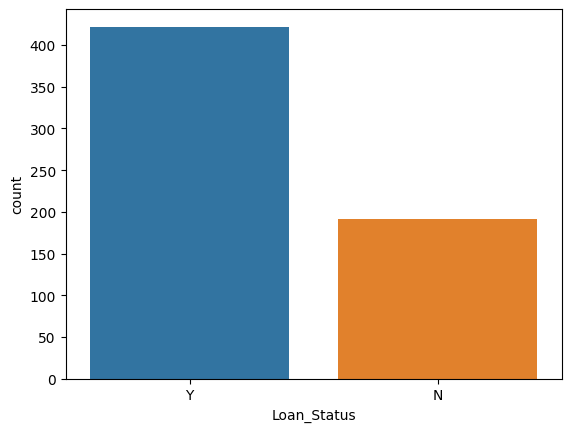

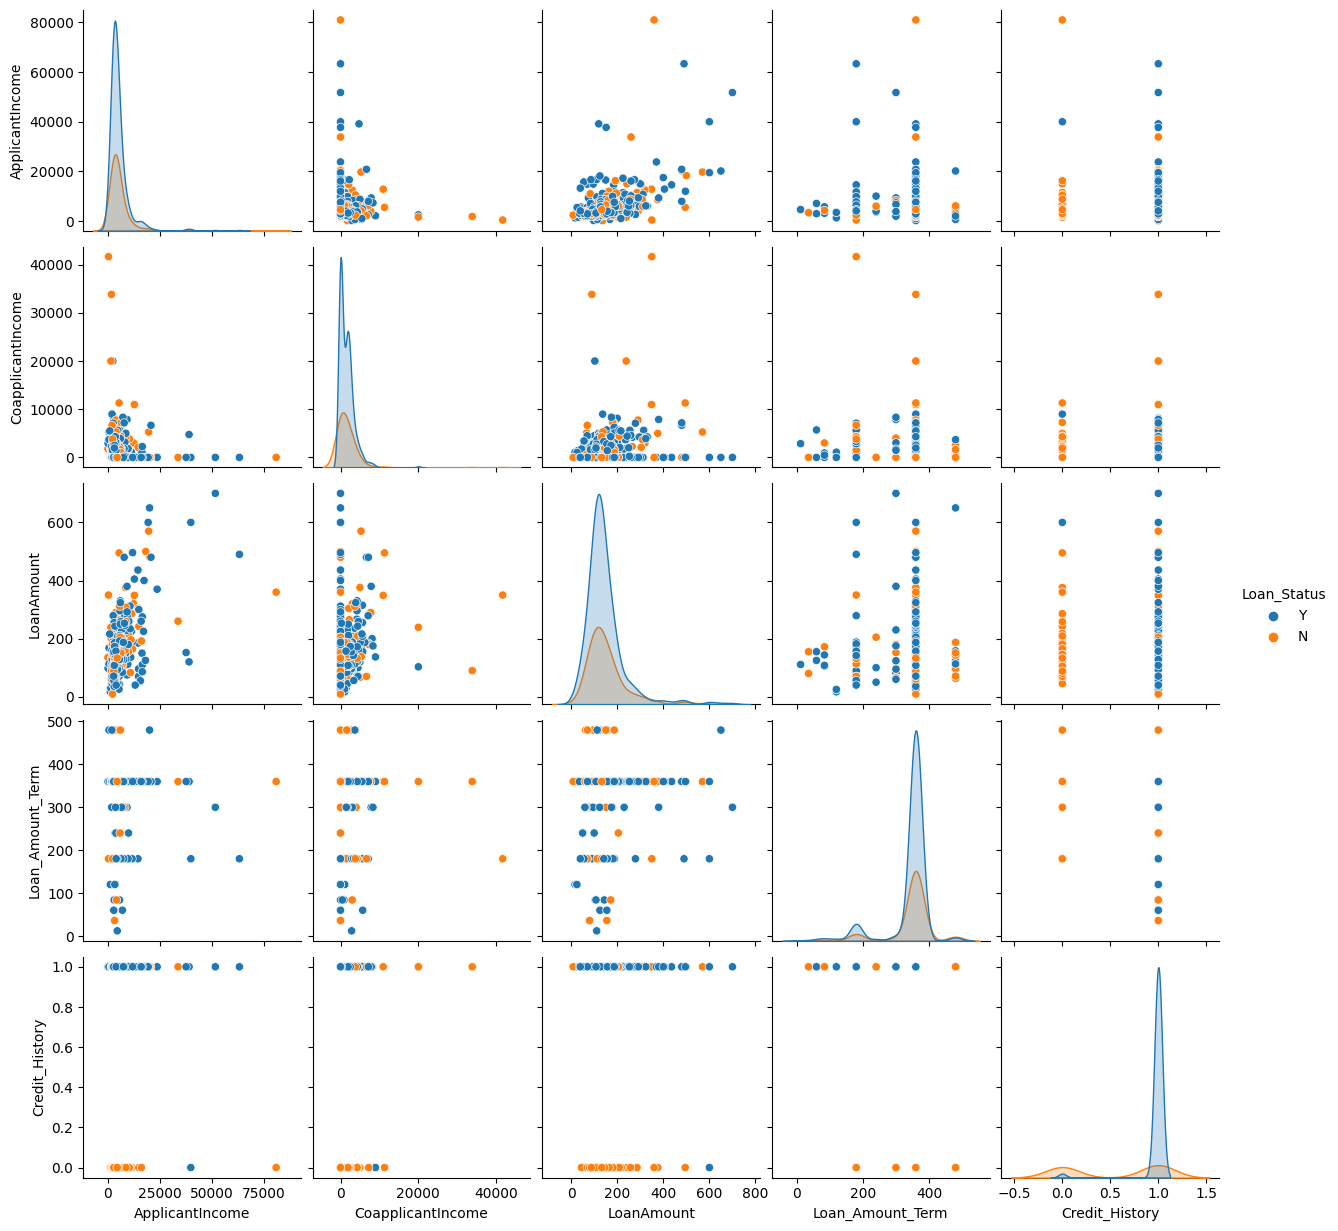

In [116]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the training data
train_df = pd.read_csv("/home/nandu/Downloads/train_ctrUa4K.csv")

# Check for missing values
print(train_df.isnull().sum())

# Explore the distribution of each feature
sns.countplot(x='Loan_Status', data=train_df)
plt.show()

# Visualize relationships between features
sns.pairplot(train_df, hue='Loan_Status')
plt.show()


In [ ]:
Step 2: Pre-processing

In [131]:
# Step 2: Exploratory Data Analysis and Preprocessing

# Load the data
train_df = pd.read_csv("/home/nandu/Downloads/train_ctrUa4K.csv")

# Display basic information about the dataset
print("Columns and datatypes:")
print(train_df.dtypes)
print("\nSummary statistics:")
print(train_df.describe())
print("\nMissing values:")
print(train_df.isnull().sum())

# Handle missing values
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
# Repeat the above for other columns with missing values

# Encode categorical variables
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
train_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)

# Convert 'Loan_Status' to numerical values (assuming it's your target variable)
train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y': 1, 'N': 0})

# Display columns after preprocessing
print("\nColumns after preprocessing:", train_df.columns)


Columns and datatypes:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Summary statistics:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.25000

In [ ]:
Step 3: Modelling

In [124]:
# Step 3: Modelling

# Import necessary libraries
from sklearn.impute import SimpleImputer

# Split the data into features (X) and target variable (y)
X_train = train_df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y_train = train_df['Loan_Status']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can adjust the strategy based on your needs
X_train_split_imputed = imputer.fit_transform(X_train_split)
X_test_split_imputed = imputer.transform(X_test_split)

# Initialize the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_split_imputed, y_train_split)

# Make predictions on the test set
y_pred = model.predict(X_test_split_imputed)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f'Accuracy: {accuracy_score(y_test_split, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test_split, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test_split, y_pred)}')



Accuracy: 0.7560975609756098
Classification Report:
              precision    recall  f1-score   support

           N       0.78      0.42      0.55        43
           Y       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123

Confusion Matrix:
[[18 25]
 [ 5 75]]


In [ ]:
Step 4: Fine-tuning

In [136]:
# Step 4: Hyperparameter Tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_split_imputed, y_train_split)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [140]:
# Initialize the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_split_imputed, y_train_split)


RandomForestClassifier(random_state=42)

In [ ]:
Step 5: Generate Predictions

In [141]:

# Load the test dataset
test_df = pd.read_csv('/home/nandu/Downloads/test_lAUu6dG.csv')  # Replace with the actual path

# Display basic information about the dataset
print("Columns and datatypes:")
print(test_df.dtypes)
print("\nSummary statistics:")
print(test_df.describe())
print("\nMissing values:")
print(test_df.isnull().sum())

# Handle missing values
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)
test_df['Married'].fillna(test_df['Married'].mode()[0], inplace=True)
# Repeat the above for other columns with missing values

# Encode categorical variables
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
test_df = pd.get_dummies(test_df, columns=categorical_columns, drop_first=True)

# Display columns after preprocessing
print("\nColumns after preprocessing:", test_df.columns)
# Handle missing values, encode categorical variables, etc.

# Extract features from the test dataset (remove 'Loan_ID' if it's present)
X_test = test_df.drop(['Loan_ID'], axis=1)

# Handle missing values in the test set (use the imputer fitted on the training set)
X_test['Dependents'] = X_test['Dependents'].replace('3+', 3).astype(float)

# Use the imputer fitted on the training set to handle missing values
X_test_imputed = imputer.transform(X_test)

# Continue with one-hot encoding and other preprocessing steps if needed

# Make predictions on the test set
test_predictions = model.predict(X_test_imputed)

# Create a DataFrame with 'Loan_ID' and 'Loan_Status' columns
submission_df = pd.DataFrame({'Loan_ID': test_df['Loan_ID'], 'Loan_Status': test_predictions})

# Save the predictions to a CSV file
submission_df.to_csv('/home/nandu/Downloads/submission_file.csv', index=False)  # Replace with the desired path



Columns and datatypes:
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

Summary statistics:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136.132597        342.537396   
std        4910.685399        2334.232099   61.366652         65.156643   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  100.250000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.0000